In [1]:
from b2b_emb_quest_searchlight import *

In [2]:
analysis = {'states_wanted':['meditation','hypnose'],'group':'all'}

p.states_wanted = analysis['states_wanted']
p.group = analysis['group']
    
diff_emb,df_phenoscore = load_data(p)
len(diff_emb.emb.shape)

diff_emb.get_surf_emb(p)
diff_emb.get_neighborhood(p)
    
brain_data = np.squeeze(diff_emb.emb) 
print('brain_data.shape : ',brain_data.shape)

voxels_nb = diff_emb.adjacency.shape[0]
print('n voxels = ',voxels_nb)

# diff_emb, factors, factors_random = main(p)
# df['states_wanted'].append(p.states_wanted)
# df['group'].append(p.group)
# df['factors'].append(factors)
# df['factors_random'].append(factors_random)

    
# df = pd.DataFrame(df)
# df
# df.to_pickle(os.path.join(p.results_path,f'decoding_results_{job_id}.pkl'),compression='zip')


# print("--- %s seconds ---" % (time.time() - start_time))

n = 36 subjects (after outliers removal)
outliers :  [15 27 32 40 15 27 32 40]
brain_data.shape :  (72, 20484)
n voxels =  20484


## Load the behavioral data

In [6]:
import sys
sys.path.append('/home/romy.beaute/projects/hypnomed/META/')
from scipy.io import loadmat
from helpers_gradient import *

embmat_path = '/home/romy.beaute/projects/hypnomed/data/emb_matrices'
matfile = 'control_meditation_hypnose'
# emb = np.load(embmat_path+'/group_{}_embedding.mat'.format(matfile))

b,b_emb = load_embmat(embmat_path+'/group_{}_embedding.mat'.format(matfile),show_infos=True)
b_emb.shape


outliers_indxs = [15,27,32,40] #subject outliers (eg 'sub-15')
outliers_indxs_hyp = [15,27,39]
outliers = [x-1 for x in outliers_indxs] #index subject outliers (eg indx 14 to delete 'sub-15')
outliers_hyp = [x-1 for x in outliers_indxs_hyp]
# print(outliers,outliers_hyp)
# print('Subject removed (hypnose): ',outliers_hyp)

emb_con = np.delete(b_emb[:40],outliers,0)
emb_med = np.delete(b_emb[40:80],outliers,0)
emb_hyp = np.delete(b_emb[80:],outliers_hyp,0)

print(emb_con.shape,emb_med.shape,emb_hyp.shape)
embeddings = {
    'control':emb_con,
    'meditation':emb_med,
    'hypnose':emb_hyp
    }

emb_states = np.vstack([emb_con,emb_med,emb_hyp]) #embedding with all 3 states conditions
print(emb_states.shape) #control shape of the global embedding


emb_sublist = np.delete(b['subs'],[x-1 for x in outliers_indxs])
print('Redefining subject list after outlier removal : n_subjects = {} --> n_subjects = {}'.format(len(b['subs']),len(emb_sublist )))

n_subjects = len(emb_sublist)
print('n subjects = ',n_subjects)
# emb_sample = [f'sub-{i:02d}' for i in range(1, n_subjects + 1)]
emb_sample = emb_sublist.tolist()


hypnomed_csv = pd.read_csv('/home/romy.beaute/projects/hypnomed/analysis/pheno_stats/hypnomed.csv')
hypnomed_csv_withoutliers = hypnomed_csv.query('outlier == 0')
hypnomed_csv_G1 = hypnomed_csv_withoutliers.loc[hypnomed_csv_withoutliers['group']=='G1']
hypnomed_csv_G2 = hypnomed_csv_withoutliers.loc[hypnomed_csv_withoutliers['group']=='G2']


sublist_hypnomed = hypnomed_csv.query('outlier == 0')['sub_id'].tolist()
sublist_hypnomed_G1 = hypnomed_csv_G1['sub_id'].tolist()
sublist_hypnomed_G2 = hypnomed_csv_G2['sub_id'].tolist()
print('n = {} subjects in G1 / n = {} subjects in G2'.format(len(sublist_hypnomed_G1),len(sublist_hypnomed_G2)))


labels = np.concatenate([([i]*n_subjects) for i in ['control','meditation','hypnosis']],axis=0)
subjects = emb_sample*3
sub_groups = hypnomed_csv_withoutliers['group'].tolist()*3

behavioral_hypnomed = pd.DataFrame(data={'labels':labels,'subjects':subjects,'group':sub_groups})
behavioral_hypnomed


n_subjects = len(emb_sublist)
print('n subjects = ',n_subjects)
# emb_sample = [f'sub-{i:02d}' for i in range(1, n_subjects + 1)]
emb_sample = emb_sublist.tolist()

labels = np.concatenate([([i]*n_subjects) for i in ['control','meditation','hypnosis']],axis=0)
subjects = emb_sample*3
sub_groups = hypnomed_csv_withoutliers['group'].tolist()*3

behavioral_hypnomed = pd.DataFrame(data={'labels':labels,'subjects':subjects,'group':sub_groups})
behavioral_hypnomed

 - shape embedding (n_subjects, n_voxels, n_dims): (119, 18715, 5)
 - n = 40 subjects
 - condition : ['control   ' 'meditation' 'hypnose   ']
 - path : /home/romy.beaute/projects/hypnomed/data/emb_matrices/group_control_meditation_hypnose_embedding.mat

(36, 18715) (36, 18715) (36, 18715)
(108, 18715)
Redefining subject list after outlier removal : n_subjects = 40 --> n_subjects = 36
n subjects =  36
n = 18 subjects in G1 / n = 18 subjects in G2
n subjects =  36


,labels,subjects,group
0,control,sub-01,G2
1,control,sub-02,G1
2,control,sub-03,G1
3,control,sub-04,G1
4,control,sub-05,G2
...,...,...,...
103,hypnosis,sub-35,G2
104,hypnosis,sub-36,G1
105,hypnosis,sub-37,G2
106,hypnosis,sub-38,G2


In [12]:
states_to_compare = ['meditation','hypnosis']

y = behavioral_hypnomed['labels']
condition_mask_hypnomed = y.isin([states_to_compare[0],states_to_compare[1]])

y = y[condition_mask_hypnomed] #conditions_hypnomed 

session_label_hypnomed = behavioral_hypnomed['subjects'][condition_mask_hypnomed]


y.shape

NameError: name 'X' is not defined

# Cortical surface-based searchlight decoding

https://colab.research.google.com/drive/1cIr-dBOqmKPUmbb4WmmdVFUrkEGTt80P#scrollTo=DxCkBoFIqVg_

https://nilearn.github.io/dev/auto_examples/02_decoding/plot_haxby_searchlight_surface.html#sphx-glr-auto-examples-02-decoding-plot-haxby-searchlight-surface-py

In [32]:
radius = 6.
nn = neighbors.NearestNeighbors(radius=radius)
adjacency = nn.fit(brain_data.T).radius_neighbors_graph(brain_data.T).tolil()


<20484x20484 sparse matrix of type '<class 'numpy.float64'>'
	with 3499280 stored elements in List of Lists format>

### Searchlight computation

In [20]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from nilearn.decoding.searchlight import search_light

# Simple linear estimator preceded by a normalization step
estimator = make_pipeline(StandardScaler(),
                          RidgeClassifier(alpha=10.))

# Define cross-validation scheme
cv = KFold(n_splits=3, shuffle=False)

X = brain_data

print(y.shape,X.shape)

(72,) (72, 20484)


In [27]:
scores = search_light(X, y, estimator, adjacency, cv=cv, n_jobs=1)
scores

KeyboardInterrupt: 

## Visualization

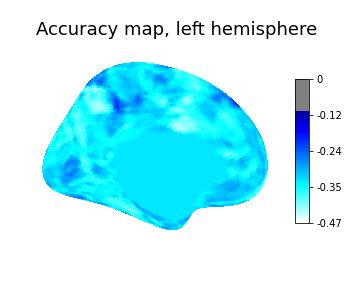

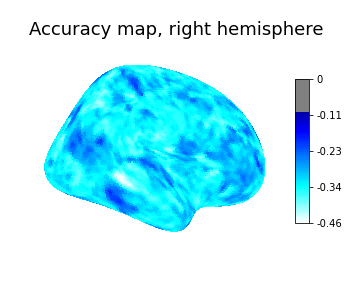

In [26]:
from nilearn import datasets, surface, plotting
# # Fetch a coarse surface of the left hemisphere only for speed
fsaverage = datasets.fetch_surf_fsaverage(mesh='fsaverage5')

infl_mesh_l = fsaverage['infl_' + 'left']
infl_mesh_r = fsaverage['infl_' + 'right']

chance = .5
plotting.plot_surf_stat_map(infl_mesh_l, scores[:10242] - chance,
                            view='medial', colorbar=True, threshold=0.1,
                            bg_map=fsaverage['sulc_' + 'left'],
                            title='Accuracy map, left hemisphere')
plotting.show()


plotting.plot_surf_stat_map(infl_mesh_r, scores[10242:] - chance,
                            view='medial', colorbar=True, threshold=0.1,
                            bg_map=fsaverage['sulc_' + 'right'],
                            title='Accuracy map, right hemisphere')

plotting.show()


# nilearn.plotting.plot_surf_stat_map('/mnt/data/romy/packages/freesurfer/subjects/fsaverage5/surf/lh.inflated',a[:10242],colorbar=True, cmap='jet', vmax=5.5,title='{}_diffusion_map_{}_lh'.format(prefix,emb_condition),output_file=image_folder+'/{}_diffusion_map_{}_lh.png'.format(prefix,emb_condition))
# nilearn.plotting.plot_surf_stat_map('/mnt/data/romy/packages/freesurfer/subjects/fsaverage5/surf/rh.inflated',a[10242:],colorbar=True, cmap='jet', vmax=5.5,  title='{}_diffusion_map_{}_rh'.format(prefix,emb_condition),output_file=image_folder+'/{}_diffusion_map_{}_rh.png'.format(prefix,emb_condition))
